**Starter Template for Data Science Challenge**

---

Thank you for participating in this challenge. This is starter notebook that demonstrates how to:

1.   Load data from a csv file into a Pandas Dataframe
2.   Basic featurisation of Text data
3. Training a classifier
4. Submitting your results using Google Colab


**TAKE NOTE** **Access the data file from** [HERE](https://drive.google.com/open?id=1EcJ7SqpGHgjk1HDR4Q2P74n8LVl_ywU1) and mount from Google Drive to download the dataset.


Kindly make a copy of this file and submit your results using Google Colab. 

In [1]:

# AUTHOR : Appau Ernest K.m



#Import libraries
# pandas and seaborn to handle our data frames
import pandas as pd
import seaborn as sns

# spacy for natural language processing 
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS as stop_words

# scikit learn package to build our ml models
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
# tensorflow for ml,matplotlib for plotting graphs and figures
import string
import tensorflow as tf
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Downloading datasets from Google Drive to Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# file path to file.csv
data = '/content/drive/My Drive/file.csv'

In [0]:
# use pandas to read our csv as a dataframe
df = pd.read_csv(data)

In [9]:
# inspect data 
df.head(20)

,Unnamed: 0,ID,Country,Verbatim,Category
0,0,5937,D,The very effective when i go to they help me i...,Customer Service
1,1,5750,D,Their service is good and I do believe in thei...,Customer Service
2,2,5690,D,Their services like when you draw or do transa...,Customer Service
3,3,5789,D,Customer relations internet banking facilities...,Customer Service
4,4,5576,D,Their service is good and their customer servi...,Customer Service
5,5,5836,D,i havent had any issues with the bank the bank...,Customer Service
6,6,2222,A,Payments are handled well / don't take time to...,Customer Service
7,7,5806,D,Most of the time you get what you want in term...,Customer Service
8,8,6390,Z,Services are good. Everything about them is g...,Customer Service
9,9,5721,D,"The relationship I have with my banker, everyt...",Customer Service


In [11]:
# inspect tail of data
df.tail(20)

,Unnamed: 0,ID,Country,Verbatim,Category
13057,13057,9039,A,The bank to have low withdrawal charges.,Fees / Rates / Charges
13058,13058,9889,A,They must be lenient in all the banking chargi...,Fees / Rates / Charges
13059,13059,8960,A,To have high interests when I investment money.,Fees / Rates / Charges
13060,13060,8772,A,"Interest, in a sense that their interest on lo...",Fees / Rates / Charges
13061,13061,9925,A,To have low bank charges on all their accounts.,Fees / Rates / Charges
13062,13062,8942,A,The bank withdrawal charges must not be high.,Fees / Rates / Charges
13063,13063,10808,A,It is for the bank charges to be low.,Fees / Rates / Charges
13064,13064,10273,A,To get the money that I have saved for a long ...,Fees / Rates / Charges
13065,13065,8970,A,Affordable bank charges.,Fees / Rates / Charges
13066,13066,10438,A,To be able to withdraw my money any time when ...,Fees / Rates / Charges


In [20]:
# check the shape of data and column indices
print("shape: ", df.shape, "  columns indices ", df.columns)

shape:  (13077, 5)   columns indices  Index(['Unnamed: 0', 'ID', 'Country', 'Verbatim', 'Category'], dtype='object')


In [21]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0  ...                 Category
0               0  ...         Customer Service
1               1  ...         Customer Service
2               2  ...         Customer Service
3               3  ...         Customer Service
4               4  ...         Customer Service
...           ...  ...                      ...
13072       13072  ...  Fees / Rates / Charges 
13073       13073  ...  Fees / Rates / Charges 
13074       13074  ...  Fees / Rates / Charges 
13075       13075  ...  Fees / Rates / Charges 
13076       13076  ...  Fees / Rates / Charges 

[13077 rows x 5 columns]>

In [25]:
# get the unoique values under category 
pd.DataFrame(df.Category.unique()).values

array([['Customer Service'],
       ['Loans'],
       ['Digital Banking'],
       ['Sponsorship'],
       ['Benefits'],
       ['Advertising and Comms '],
       ['Accessibility'],
       ['Queue Times'],
       ['Ambience'],
       ['Security'],
       ['Treat you well / Approachable '],
       ['Information / Keep you informed '],
       ['Service Quality '],
       ['Process and Procedures '],
       ['Interest Rates'],
       ['Products and Services Range '],
       ['Reliable system / ATMs '],
       ['Flexibility '],
       ['Quality of staff '],
       ['Brand Image '],
       ['Money Management '],
       ['Loan Procedures'],
       ['Fees / Rates / Charges ']], dtype=object)

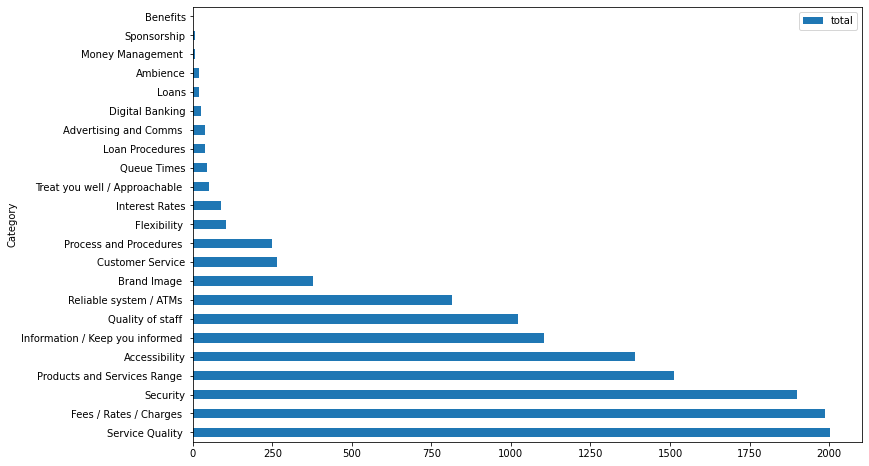

In [26]:
#visualisation to show distribution of categories across dataset

df_count_by_category = df['Category'].value_counts().reset_index()
df_count_by_category.columns = ['Category', 'total']
df_count_by_category.sort_values(by = ['total'],ascending=True)
df_count_by_category.plot.barh(x='Category', y='total',figsize=(12,8))

Build a wordcloud using words from df['Verbatim']. 

NB: StopWords should not be in the Word Cloud.

In [27]:
# Featurisation of Data  using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2',
                        encoding='latin-1', ngram_range=(1, 2), 
                        stop_words='english')

features = tfidf.fit_transform(df['Verbatim']).toarray()
tfidf.vocabulary_ # Show the vocab ..

{'effective': 898,
 'help': 1150,
 'time': 2375,
 'bank': 357,
 'need': 1568,
 'atm': 292,
 'machines': 1429,
 'want': 2560,
 'withdraw': 2599,
 'times': 2405,
 'dont': 869,
 'help time': 1155,
 'bank need': 404,
 'atm machines': 296,
 'want withdraw': 2577,
 'service': 2178,
 'good': 1090,
 'services': 2199,
 'service good': 2188,
 'like': 1346,
 'transactions': 2425,
 'charge': 618,
 'services like': 2204,
 'customer': 767,
 'relations': 1985,
 'internet': 1269,
 'banking': 455,
 'facilities': 959,
 'making': 1447,
 'efficient': 900,
 'customer relations': 770,
 'internet banking': 1271,
 'banking facilities': 478,
 'good customer': 1095,
 'customer service': 772,
 'issues': 1295,
 'atms': 299,
 'money': 1488,
 'years': 2628,
 'bank bank': 367,
 'payments': 1712,
 'handled': 1122,
 'don': 867,
 'process': 1794,
 'time process': 2390,
 'terms': 2362,
 'time want': 2402,
 'think': 2372,
 'services good': 2203,
 'relationship': 1986,
 'banker': 443,
 'polite': 1761,
 'way': 2581,
 'bran

Train any 2 models of your choice with accuracy greater than or equal to 65%

In [64]:
#Train a model 1 using a random forest classifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = features
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
print('Training Accuracy is: ',classifier.score(X_test,y_test)*100 ,"%")

Training Accuracy is:  62.079510703363916 %


In [61]:
# logistic regression model 2 trained on data
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
X = features
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

classifier = LogisticRegression()
classifier.fit(X_train,y_train)
print('Training Accuracy is: ',classifier.score(X_test,y_test)*100 ,"%")

Training Accuracy is:  67.46941896024465 %


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
